# Ancillary Services — ENTSO-E Examples

Querying FCR, aFRR, and mFRR reserve prices and activation data.

**Note:** Data availability varies by TSO. The Netherlands (NL) has good coverage
for all reserve types. Germany (DE) may return `NoDataError` for some queries.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from entsoe import Client, country_name

client = Client()

## 1. FCR Contracted Reserve Prices — Netherlands (1 week)

Prices of procured Frequency Containment Reserve (FCR) capacity.

In [2]:
start = "2024-06-01"
end = "2024-06-08"

df_fcr = client.balancing.contracted_reserve_prices(
    start, end, country="NL", reserve_type="fcr"
)
df_fcr.head()

,timestamp,value,currency,quantity_unit,price_category,reserve_type
0,2024-05-31 22:00:00+00:00,52.0,EUR,MAW,Average bid price,FCR
1,2024-06-01 02:00:00+00:00,55.0,EUR,MAW,Average bid price,FCR
2,2024-06-01 06:00:00+00:00,52.0,EUR,MAW,Average bid price,FCR
3,2024-06-01 10:00:00+00:00,66.0,EUR,MAW,Average bid price,FCR
4,2024-06-01 14:00:00+00:00,64.0,EUR,MAW,Average bid price,FCR


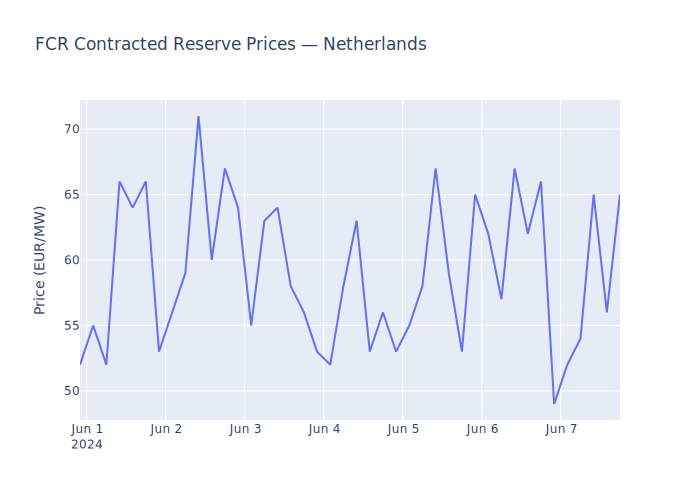

In [3]:
fig = px.line(
    df_fcr, x="timestamp", y="value",
    title="FCR Contracted Reserve Prices — Netherlands",
    labels={"value": "Price (EUR/MW)", "timestamp": ""},
)
fig.show()

## 2. Compare All Reserve Types — FCR vs aFRR vs mFRR

In [4]:
frames = []
for rtype in ["fcr", "afrr", "mfrr"]:
    df = client.balancing.contracted_reserve_prices(
        start, end, country="NL", reserve_type=rtype
    )
    df["reserve_type"] = rtype.upper()
    frames.append(df)

df_reserves = pd.concat(frames, ignore_index=True)
df_reserves

,timestamp,value,currency,quantity_unit,price_category,reserve_type
0,2024-05-31 22:00:00+00:00,52.0,EUR,MAW,Average bid price,FCR
1,2024-06-01 02:00:00+00:00,55.0,EUR,MAW,Average bid price,FCR
2,2024-06-01 06:00:00+00:00,52.0,EUR,MAW,Average bid price,FCR
3,2024-06-01 10:00:00+00:00,66.0,EUR,MAW,Average bid price,FCR
4,2024-06-01 14:00:00+00:00,64.0,EUR,MAW,Average bid price,FCR
...,...,...,...,...,...,...
65,2024-06-04 22:00:00+00:00,928.0,EUR,MAW,Average bid price,MFRR
66,2024-06-05 22:00:00+00:00,953.0,EUR,MAW,Average bid price,MFRR
67,2024-06-05 22:00:00+00:00,753.0,EUR,MAW,Average bid price,MFRR
68,2024-06-06 22:00:00+00:00,750.0,EUR,MAW,Average bid price,MFRR


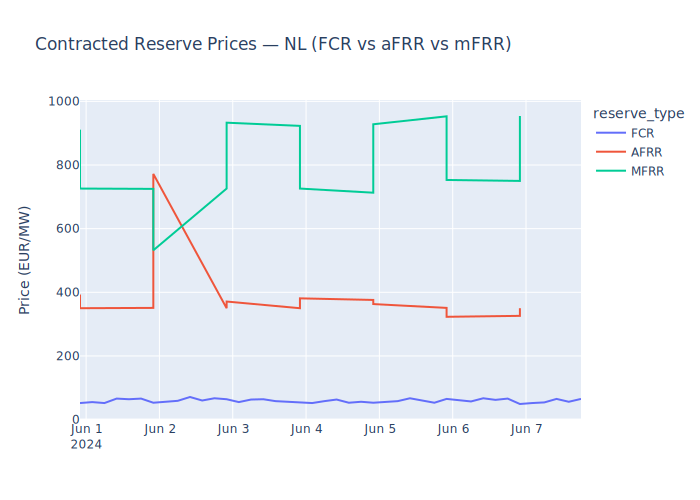

In [5]:
fig = px.line(
    df_reserves, x="timestamp", y="value", color="reserve_type",
    title="Contracted Reserve Prices — NL (FCR vs aFRR vs mFRR)",
    labels={"value": "Price (EUR/MW)", "timestamp": ""},
)
fig.show()

## 3. aFRR Activation Prices

In [6]:
df_afrr_act = client.balancing.activation_prices(
    start, end, country="NL", reserve_type="afrr"
)
df_afrr_act.head()

,timestamp,value,currency,price_unit,price_category,reserve_type
0,2024-05-31 22:00:00+00:00,91.04,EUR,MWH,Average bid price,Automatic frequency restoration reserve
1,2024-05-31 22:00:00+00:00,0.00,EUR,MWH,Average bid price,Automatic frequency restoration reserve
2,2024-05-31 22:15:00+00:00,0.00,EUR,MWH,Average bid price,Automatic frequency restoration reserve
3,2024-05-31 22:15:00+00:00,97.00,EUR,MWH,Average bid price,Automatic frequency restoration reserve
4,2024-05-31 22:30:00+00:00,97.44,EUR,MWH,Average bid price,Automatic frequency restoration reserve


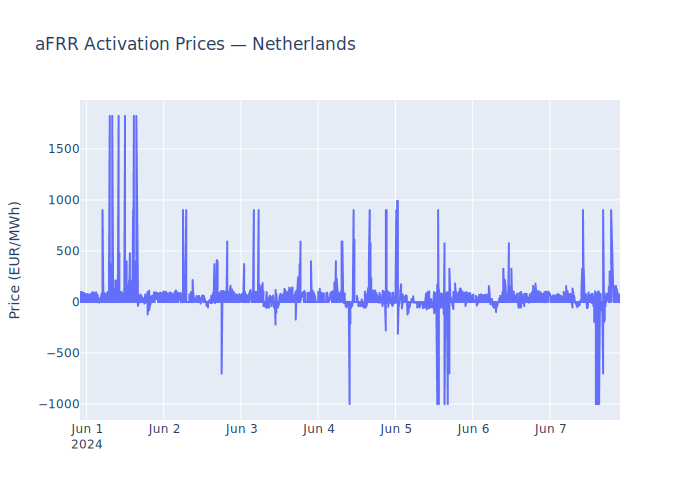

In [7]:
fig = px.line(
    df_afrr_act, x="timestamp", y="value",
    title="aFRR Activation Prices — Netherlands",
    labels={"value": "Price (EUR/MWh)", "timestamp": ""},
)
fig.show()

## 4. aFRR vs mFRR Activation Prices

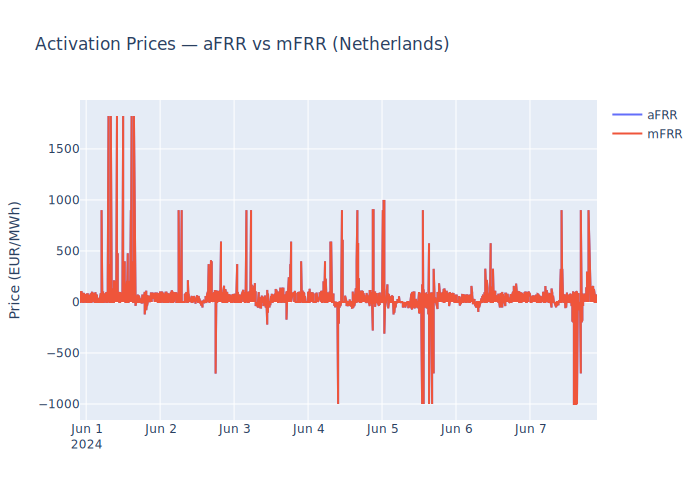

In [8]:
df_mfrr_act = client.balancing.activation_prices(
    start, end, country="NL", reserve_type="mfrr"
)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_afrr_act["timestamp"], y=df_afrr_act["value"],
    name="aFRR", line=dict(color="#636EFA"),
))
fig.add_trace(go.Scatter(
    x=df_mfrr_act["timestamp"], y=df_mfrr_act["value"],
    name="mFRR", line=dict(color="#EF553B"),
))
fig.update_layout(
    title="Activation Prices — aFRR vs mFRR (Netherlands)",
    yaxis_title="Price (EUR/MWh)",
    xaxis_title="",
)
fig.show()

## 5. Reserve Prices vs Day-Ahead Prices

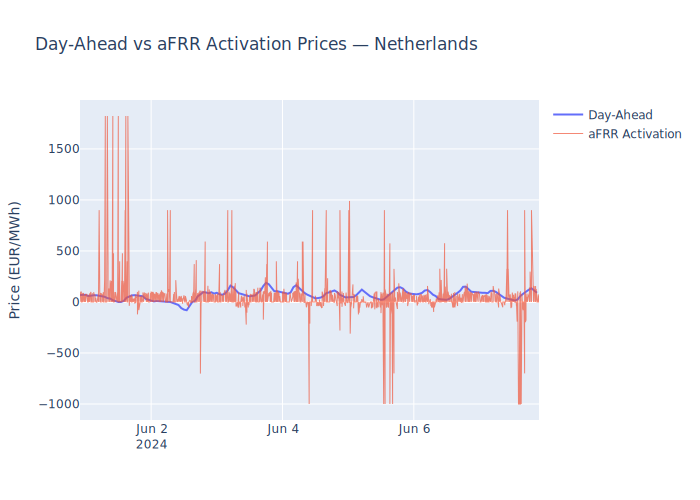

In [9]:
df_da = client.prices.day_ahead(start, end, country="NL")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_da["timestamp"], y=df_da["value"],
    name="Day-Ahead", line=dict(color="#636EFA"),
))
fig.add_trace(go.Scatter(
    x=df_afrr_act["timestamp"], y=df_afrr_act["value"],
    name="aFRR Activation", line=dict(color="#EF553B", width=1),
    opacity=0.7,
))
fig.update_layout(
    title="Day-Ahead vs aFRR Activation Prices — Netherlands",
    yaxis_title="Price (EUR/MWh)",
    xaxis_title="",
)
fig.show()

## 6. Activation Price Distribution

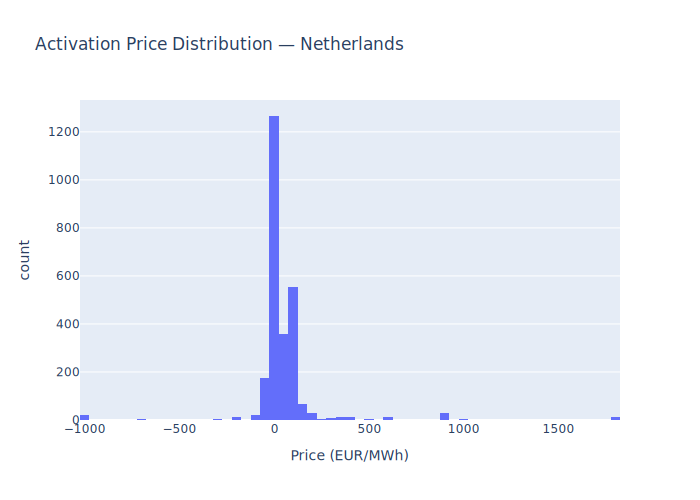

In [10]:
df_all_act = client.balancing.activation_prices(start, end, country="NL")

fig = px.histogram(
    df_all_act, x="value", nbins=80,
    title="Activation Price Distribution — Netherlands",
    labels={"value": "Price (EUR/MWh)"},
)
fig.show()